In [1]:
import pandas as pd
import numpy as np
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math 
import seaborn as sns
import matplotlib.colors as mcolors
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import os
import matplotlib


parentDirectory = os.path.abspath(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir),os.pardir))
DATA_DIR = parentDirectory +'/data/'
FIGURES_DIR = parentDirectory +'/figures/'

df_mobility = pd.read_csv(DATA_DIR+'df_mobility.csv')

studied_weeks = ['2020-02-16',
 '2020-02-23',
 '2020-03-01',
 '2020-03-08',
 '2020-03-15',
 '2020-03-22',
 '2020-03-29',
 '2020-04-05',
 '2020-04-12',
 '2020-04-19',
 '2020-04-26',
 '2020-05-03',
 '2020-05-10',
 '2020-05-17',
 '2020-05-24',
 '2020-05-31',
 '2020-06-07',
 '2020-06-14',
 '2020-06-21',
 '2020-06-28',
 '2020-07-05',
 '2020-07-12',
 '2020-07-19',
 '2020-07-26',
 '2020-08-02',
 '2020-08-09',
 '2020-08-16',
 '2020-08-23',
 '2020-08-30',
 '2020-09-06',
 '2020-09-13',
 '2020-09-20',
 '2020-09-27',
 '2020-10-04',
 '2020-10-11',
 '2020-10-18',
 '2020-10-25',
 '2020-11-01',
 '2020-11-08',
 '2020-11-15',
 '2020-11-22',
 '2020-11-29',
 '2020-12-06',
 '2020-12-13',
 '2020-12-20',
 '2020-12-27']

full_names = {
    'AU': 'Australia',
    'BR': 'Brazil',
    'CA': 'Canada',
    'FR': 'France',
    'DE': 'Germany',
    'IN': 'India',
    'IT': 'Italy',
    'MX': 'Mexico',
    'ES': 'Spain',
    'GB': 'United Kingdom',
    'US': 'United States',
    'DK': 'Denmark',
    'KE': 'Kenya', 
    'NG': 'Nigeria',
    'JP': 'Japan',
    'SE': 'Sweden',
    'ID': 'Indonesia',
    'EG': 'Egypt'
}

In [2]:
# detect changepoints for each country in the following way:

# the first date when mobility increased by 10%: start of reduced mobility in the first-wave
# the first date when mobility fell bellow 10%: end of reduced mobility in the first-wave
# we repeat the same to detect second wave

EVENT_DICTS = []

for name, gr in df_mobility.groupby('country_region_code'):
    
    EVENT = {}
    
    EVENT['country'] = name
    
    #print(gr['residential_percent_change_from_baseline'].values)
    print(name)
    x = np.array(gr['date'].values[1:316])
    y = np.array(gr['residential_percent_change_from_baseline'].values[1:316])
    y = np.array(pd.DataFrame(y).rolling(7, min_periods=1).mean())
    
    EVENT['start_md_1'] = x[np.argmax(y >= 10)]
    EVENT['end_md_1'] = x[np.argmax(y >= 10) + np.argmax(y[np.argmax(y >= 10):]<10)]
    
    print('start mobility descrease:',x[np.argmax(y >= 10)])
    print('end mobility descrease:',x[np.argmax(y >= 10) + np.argmax(y[np.argmax(y >= 10):]<10)])
    
    if name in ['CA','ES','GB','IT','DE','FR','US']:
        end_mob_d = np.argmax(y >= 10) + np.argmax(y[np.argmax(y >= 10):]<10)
        print('start mobility descrease 2nd wave:', x[end_mob_d+1 +np.argmax(y[end_mob_d+1:]>=10)])
        EVENT['start_md_2'] = x[end_mob_d+1 +np.argmax(y[end_mob_d+1:]>=10)]
    else:
        print('start mobility descrease 2nd wave:', np.nan)
        EVENT['start_md_2'] = np.nan
    
    EVENT_DICTS.append(EVENT)
    

AU
start mobility descrease: 2020-03-27
end mobility descrease: 2020-06-07
start mobility descrease 2nd wave: nan
BR
start mobility descrease: 2020-03-23
end mobility descrease: 2020-08-09
start mobility descrease 2nd wave: nan
CA
start mobility descrease: 2020-03-19
end mobility descrease: 2020-06-21
start mobility descrease 2nd wave: 2020-10-12
DE
start mobility descrease: 2020-03-21
end mobility descrease: 2020-05-09
start mobility descrease 2nd wave: 2020-12-18
DK
start mobility descrease: 2020-03-17
end mobility descrease: 2020-05-07
start mobility descrease 2nd wave: nan
EG
start mobility descrease: 2020-03-24
end mobility descrease: 2020-07-01
start mobility descrease 2nd wave: nan
ES
start mobility descrease: 2020-03-17
end mobility descrease: 2020-06-14
start mobility descrease 2nd wave: 2020-11-07
FR
start mobility descrease: 2020-03-18
end mobility descrease: 2020-06-08
start mobility descrease 2nd wave: 2020-11-01
GB
start mobility descrease: 2020-03-23
end mobility descrea

## Get the maximum decreased mobility

In [3]:
for name, gr in df_mobility.groupby('country_region_code'):
    
    x = np.array(gr['date'].values[1:316])
    y = np.array(gr['residential_percent_change_from_baseline'].values[1:316])
    y = np.array(pd.DataFrame(y).rolling(7, min_periods=1).mean())
    if name=='SE':
        print(name,x[np.argmax(y[:50])],np.max(y[:50]))
    else:
        print(name,x[np.argmax(y)],np.max(y))



AU 2020-04-16 21.714285714285715
BR 2020-03-28 20.857142857142858
CA 2020-04-16 23.285714285714285
DE 2020-04-16 17.428571428571427
DK 2020-03-24 16.857142857142858
EG 2020-05-29 19.0
ES 2020-04-13 31.428571428571427
FR 2020-03-30 30.428571428571427
GB 2020-04-16 25.714285714285715
ID 2020-05-07 19.714285714285715
IN 2020-04-14 29.142857142857142
IT 2020-03-31 31.571428571428573
JP 2020-05-06 21.428571428571427
KE 2020-04-13 24.571428571428573
MX 2020-04-15 21.142857142857142
NG 2020-04-26 28.0
SE 2020-04-05 10.142857142857142
US 2020-04-10 19.428571428571427


In [4]:
EVENT_DICTS

[{'country': 'AU',
  'end_md_1': '2020-06-07',
  'start_md_1': '2020-03-27',
  'start_md_2': nan},
 {'country': 'BR',
  'end_md_1': '2020-08-09',
  'start_md_1': '2020-03-23',
  'start_md_2': nan},
 {'country': 'CA',
  'end_md_1': '2020-06-21',
  'start_md_1': '2020-03-19',
  'start_md_2': '2020-10-12'},
 {'country': 'DE',
  'end_md_1': '2020-05-09',
  'start_md_1': '2020-03-21',
  'start_md_2': '2020-12-18'},
 {'country': 'DK',
  'end_md_1': '2020-05-07',
  'start_md_1': '2020-03-17',
  'start_md_2': nan},
 {'country': 'EG',
  'end_md_1': '2020-07-01',
  'start_md_1': '2020-03-24',
  'start_md_2': nan},
 {'country': 'ES',
  'end_md_1': '2020-06-14',
  'start_md_1': '2020-03-17',
  'start_md_2': '2020-11-07'},
 {'country': 'FR',
  'end_md_1': '2020-06-08',
  'start_md_1': '2020-03-18',
  'start_md_2': '2020-11-01'},
 {'country': 'GB',
  'end_md_1': '2020-08-03',
  'start_md_1': '2020-03-23',
  'start_md_2': '2020-10-21'},
 {'country': 'ID',
  'end_md_1': '2020-08-10',
  'start_md_1': '

In [5]:
df_mobility['full_name'] = df_mobility['country_region_code'].apply(lambda x: full_names[x])

In [6]:
full_names

{'AU': 'Australia',
 'BR': 'Brazil',
 'CA': 'Canada',
 'DE': 'Germany',
 'DK': 'Denmark',
 'EG': 'Egypt',
 'ES': 'Spain',
 'FR': 'France',
 'GB': 'United Kingdom',
 'ID': 'Indonesia',
 'IN': 'India',
 'IT': 'Italy',
 'JP': 'Japan',
 'KE': 'Kenya',
 'MX': 'Mexico',
 'NG': 'Nigeria',
 'SE': 'Sweden',
 'US': 'United States'}

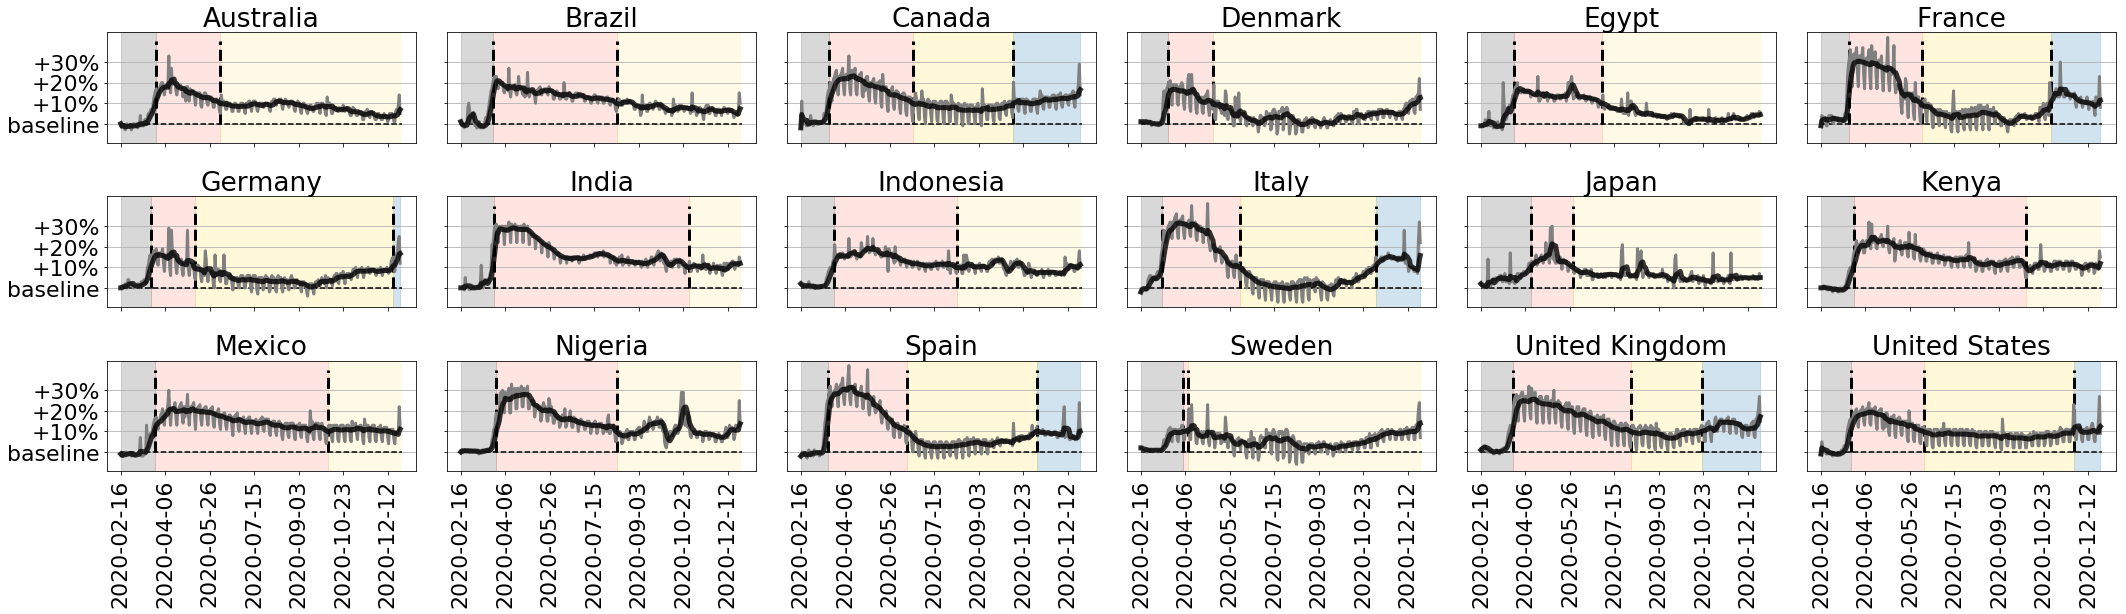

In [7]:
matplotlib.rcParams.update({'font.size': 22})

fig, ax = plt.subplots(3,6, figsize= (30,9), sharey = True, sharex = True)

colors = list(mcolors.TABLEAU_COLORS.keys())*2

cnt = 0

for name in list(sorted(full_names.values())):

    gr =  df_mobility.loc[df_mobility['full_name'] == name]
    sbplt = ax[ math.floor(cnt/6), cnt%6]
    x = np.array(gr['date'].values[1:316])
    y = np.array(gr['residential_percent_change_from_baseline'].values[1:316])
    
    sbplt.plot(range(315),y, linewidth = 3,color = 'gray', label = name)
    
    y = np.array(pd.DataFrame(y).rolling(7, min_periods=1).mean())
    sbplt.plot(range(315),y, linewidth = 5, alpha = 0.8,color = 'black', label = name)
    
    sbplt.vlines(np.argmax(y >= 10), 0, 40, linewidth = 3, color = 'black', linestyle = '--')
    sbplt.vlines(np.argmax(y >= 10) + np.argmax(y[np.argmax(y >= 10):]<10), 0, 40, linewidth = 3, color = 'black', linestyle = '--')
    
    sbplt.axvspan(0,np.argmax(y >= 10), 
                  alpha=0.3, color = 'gray')
    
    sbplt.axvspan(np.argmax(y >= 10), np.argmax(y >= 10) + np.argmax(y[np.argmax(y >= 10):]<10), 
                  alpha=0.2, color = 'salmon')
    
    
    if name in ['Canada','Spain','United Kingdom','Italy','Germany','France','United States']:
        end_mob_d = np.argmax(y >= 10) + np.argmax(y[np.argmax(y >= 10):]<10)
        sbplt.vlines(end_mob_d+1 +np.argmax(y[end_mob_d+1:]>=10), 0, 40, linewidth = 3, color = 'black', linestyle = '--')
        
        
        sbplt.axvspan(end_mob_d+1 + np.argmax(y[end_mob_d+1:]>=10), 314, alpha=0.2, color='tab:blue')
        sbplt.axvspan(np.argmax(y >= 10) + np.argmax(y[np.argmax(y >= 10):]<10), end_mob_d+1 + np.argmax(y[end_mob_d+1:]>=10), alpha=0.15, color='gold')
    else:
        sbplt.axvspan(np.argmax(y >= 10) + np.argmax(y[np.argmax(y >= 10):]<10), 314, alpha=0.1, color='gold')
        pass
    
    start_md = np.argmax(y >= 10)
    end_md = np.argmax(y >= 10) + np.argmax(y[np.argmax(y >= 10):]<10)
    

    cnt +=1
    sbplt.set_title(name)
    
    sbplt.set_xticks(range(315)[::50])
    sbplt.set_xticklabels(gr['date'].values[1:316][::50], rotation = 90)

    sbplt.set_yticks([0,10,20,30])
    sbplt.set_yticklabels(["baseline","+10%","+20%","+30%"]);

    sbplt.hlines(0,0,316, linestyle = '--')
    sbplt.grid(axis='y')
    
plt.tight_layout()
plt.savefig(FIGURES_DIR+"study_design_2.pdf", bbox_inches='tight')